<h1> IMDB :Web Scraping  <h1>

<h2> By K. Gokula Chandra <h2>
<h3> Date : 03-06-21<h3>
<p> In this notebook ,am gonna perform Data Scraping from web(IMDB,It's an website of movie reviews and information.)</p>

<p> Here, we use BeautifulSoup library(in-built) for structuring data and also we can acheive the former action with help of json library through API(Application Programming Interface</p>
<p>First things First, lets import required packages/libraries</p>

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import json
from datetime import date
import matplotlib.pyplot as plt
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry


<p>The following function helps us to:<br>
    *) It takes parmeters year and count,the number of movies and year for the process of extraction.<br>
    *)If the given year is the current year then it will process upto present day else the entire year(Limitation)<br>
    *) This function gets the data from web and converts into html file with BeautifulSoup library and the data is transformed into an dataframe using pandas library and the dataframe is returned<br>
    </p>

In [15]:
def myfunction(year,count):
    movies=[]
    genre=[]
    ids=[]
    rating=[]
    runtime=[]
    certify=[]
    review=[]
    current=date.today().strftime("%Y-%m-%d")
    start="{}-01-01".format(year)
    y=int(str(current).split('-')[0])
    if year==y:
        end=current
    else:
        end='{}-12-31'.format(year)
    url = 'https://www.imdb.com/search/title/?title_type=feature&release_date={s},{e}&languages=en&adult=include&count={c}'.format(s=start,e=end,c=count)
    session = requests.Session()
    retry = Retry(connect=3, backoff_factor=0.5)
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    res=session.get(url)
    res=requests.get(url)
    data=BeautifulSoup(res.text,'html')
    for i in data.find("body").find_all("div",{"class":"lister-item-content"}):
        for j in i.find_all("h3"):
            m_temp=j.find("a").text
        for j in i.find_all("strong"):
            r_temp=float(j.text)
        for j in i.find_all("span",{"class":"genre"}):
            t=[]
            for k in str(j.text).split(','):
                t.append(k.strip())
            g_temp=t
        for j in i.find_all("h3"):
            i_temp=str(j.find("a")).split('/')[2]
        for j in i.find_all("span",attrs={"class":"runtime"}):
            ru_temp=str(j.text).split(' ')[0]
        for j in i.find_all("span",{"class":"certificate"}):
            c_temp=str(j.text)
        for j in i.find_all("meta",{"itemprop":"ratingCount"}):
            re_temp=int(str(j).split("\"")[1])
        if m_temp and r_temp and g_temp and i_temp and ru_temp and c_temp and re_temp:
            movies.append(m_temp)
            genre.append(g_temp)
            rating.append(r_temp)
            ids.append(i_temp)
            runtime.append(int(ru_temp))
            certify.append(c_temp)
            review.append(re_temp)
    df=pd.DataFrame({'Id':ids,'Movie Title':movies,'Genre':genre,'Rating':rating,'Runtime(in min)':runtime,'Certificate':certify,'Reviews':review})
    return df

<b> Now, Lemme call myfunction on year 2021 With count As 20</b>

In [16]:
k=myfunction(2021,20)
k

,Id,Movie Title,Genre,Rating,Runtime(in min),Certificate,Reviews
0,tt0993840,Army of the Dead,"[Action, Crime, Horror]",5.9,148,18,99788
1,tt3228774,Cruella,"[Comedy, Crime]",7.4,134,PG-13,28905
2,tt11083552,Wrath of Man,"[Action, Thriller]",7.2,119,R,35696
3,tt5433138,F9,"[Action, Adventure, Crime]",5.2,145,PG-13,5620
4,tt6111574,The Woman in the Window,"[Crime, Drama, Mystery]",5.7,100,18,42815
5,tt3215824,Those Who Wish Me Dead,"[Action, Drama, Thriller]",6.0,100,R,25292
6,tt7979580,The Mitchells vs the Machines,"[Animation, Adventure, Comedy]",7.8,113,13,51971
7,tt10342730,Spiral: From the Book of Saw,"[Crime, Horror, Mystery]",5.5,93,R,10314
8,tt0293429,Mortal Kombat,"[Action, Adventure, Fantasy]",6.2,110,A,107468
9,tt9419056,The Unholy,"[Drama, Horror, Mystery]",5.0,99,PG-13,6389


<b> Kudos, We got the data cleaned and arranged i nform of dataframe successfuly through the website <br> Now lets have some visualizations on movie ratings , genre , etc.,</b>

In [17]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":'white',
            "figure.facecolor":'white',
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'font.size':20,
            'ytick.labelsize':20})

<AxesSubplot:xlabel='Rating', ylabel='Movie Title'>

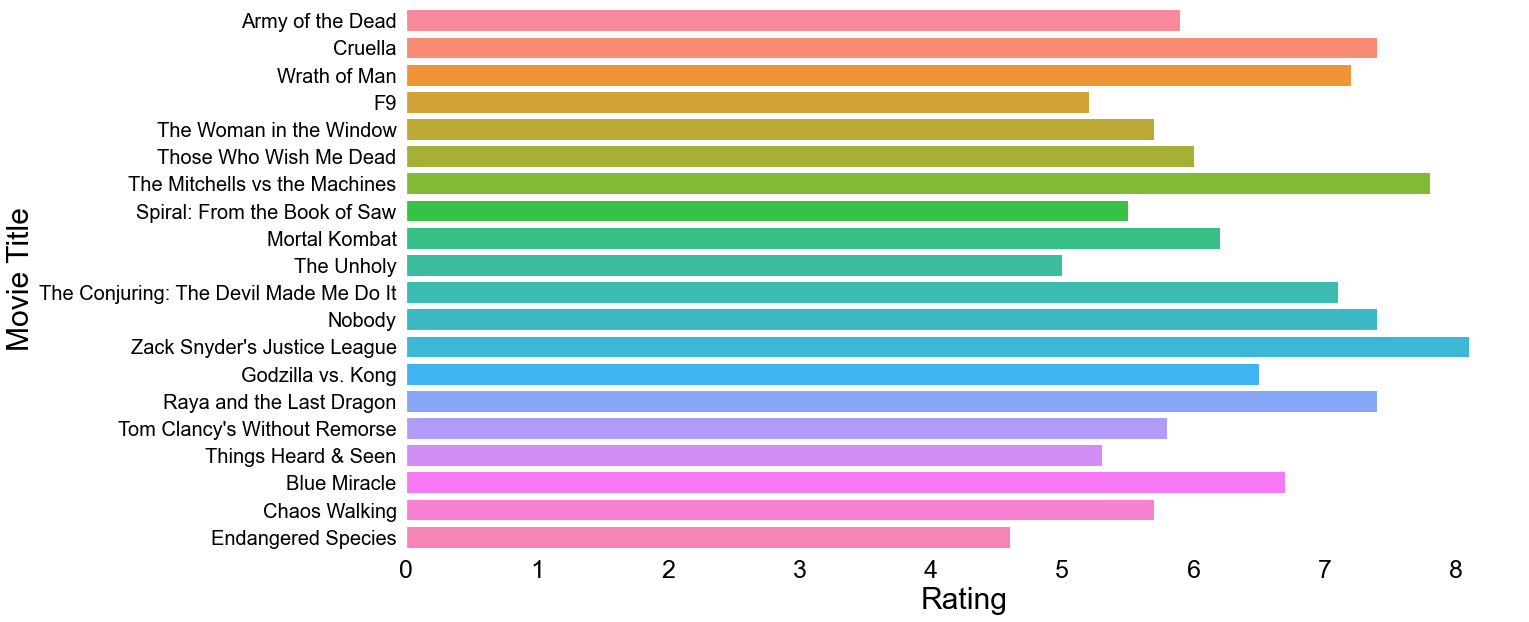

In [18]:
sns.barplot(y='Movie Title',x='Rating',data=k,saturation=1)

<p>It shows that Zack Snyders Justice League has the highest rating. Well, We all know why,Its a better version of the same movie From 2017 which was directed first by Zack Snyder and then later by another directer which led to a disaster In 2017.</p>

<b>Okay, now lets add score attribute to the dataframe by taking rating and revies into the account</b>

In [19]:
df=myfunction(2021,250)
d=pd.DataFrame(columns=['Name','Genre','Rating','Score'])
for i in range(df.shape[0]):
    for j in df.iloc[i]['Genre']:
        d=d.append({'Name':df.iloc[i]['Movie Title'],'Genre':j,'Rating':df.iloc[i]['Rating'],'Score':df.iloc[i]['Rating']/df.iloc[i]['Reviews']},ignore_index=True)
d

,Name,Genre,Rating,Score
0,Army of the Dead,Action,5.9,0.000059
1,Army of the Dead,Crime,5.9,0.000059
2,Army of the Dead,Horror,5.9,0.000059
3,Cruella,Comedy,7.4,0.000256
4,Cruella,Crime,7.4,0.000256
...,...,...,...,...
513,Best Friends Forever,Thriller,5.5,0.103774
514,Wild Indian,Thriller,6.8,0.053543
515,Félix et le trésor de Morgäa,Animation,6.1,0.080263
516,Félix et le trésor de Morgäa,Adventure,6.1,0.080263


In [22]:
temp=d.groupby('Genre').count()
temp['Score']

Genre
Action       56
Adventure    34
Animation    16
Biography     5
Comedy       56
Crime        32
Drama        98
Family        9
Fantasy      11
History       4
Horror       55
Music         4
Musical       3
Mystery      20
Romance      23
Sci-Fi       16
Sport         2
Thriller     69
War           1
Western       4
Name: Score, dtype: int64

In [259]:
temp.columns=['Count','Score']

<b>Let's visualize no of movies in all Genres for the year.</b>

<AxesSubplot:xlabel='Genre'>

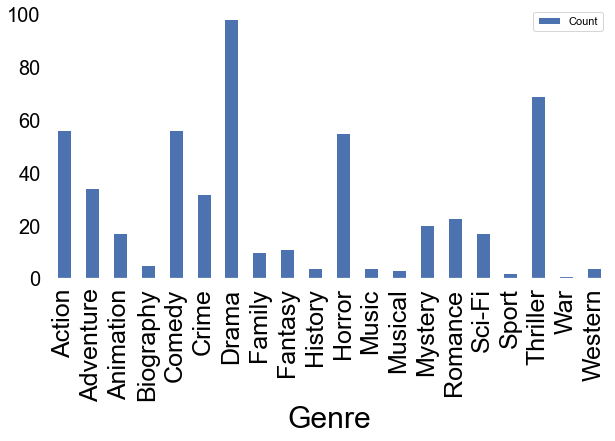

In [261]:
temp.plot(kind='bar',y='Count')

<b>Let's visualize rating of all Genres for the given year.</b>

<AxesSubplot:xlabel='Genre'>

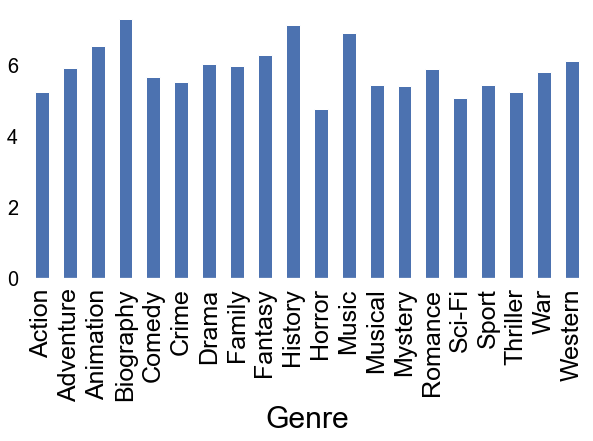

In [262]:
temp=d.groupby('Genre')['Rating'].mean()
plt.rcParams['figure.figsize']=(10,5)
temp.plot(kind='bar',y='Rating')

<b> Now will try to get hte top rated genre based on the score for the given year </b>

In [275]:
temp=d.groupby('Genre')['Score'].max()
temp=pd.DataFrame(temp)
temp.reset_index(inplace=True)
temp=temp.sort_values(by='Score',ascending=False)
temp.iloc[0].Genre

'Thriller'

<p> Lets go bit further and create an fuction that return the scored genre when the year is passed as parmetre </p>

In [278]:
def getgenre(year):
    df=myfunction(year,250)
    d=pd.DataFrame(columns=['Name','Genre','Rating','Score'])
    for i in range(df.shape[0]):
        for j in df.iloc[i]['Genre']:
            d=d.append({'Name':df.iloc[i]['Movie Title'],'Genre':j,'Rating':df.iloc[i]['Rating'],'Score':df.iloc[i]['Rating']/df.iloc[i]['Reviews']},ignore_index=True)
    temp=d.groupby('Genre')['Score'].max()
    temp=pd.DataFrame(temp)
    temp.reset_index(inplace=True)
    temp=temp.sort_values(by='Score',ascending=False)
    return temp.iloc[0].Genre
for i in range(1970,2022):
    print(i,getgenre(i))

1970 Drama
1971 Adult
1972 Drama
1973 Comedy
1974 Adult
1975 Adult
1976 Action
1977 Drama
1978 Crime
1979 Adult
1980 Crime
1981 Drama
1982 Comedy
1983 Adult
1984 Drama
1985 Romance
1986 Drama
1987 Romance
1988 Thriller
1989 Thriller
1990 Horror
1991 Thriller
1992 Thriller
1993 Thriller
1994 Action
1995 Drama
1996 Drama
1997 Comedy
1998 Thriller
1999 Romance
2000 Thriller
2001 Drama
2002 Drama
2003 Romance
2004 Comedy
2005 Drama
2006 Comedy
2007 Horror
2008 Comedy
2009 Comedy
2010 Drama
2011 Comedy
2012 Drama
2013 Romance
2014 Horror
2015 Musical
2016 Romance
2017 Thriller
2018 Mystery
2019 Horror
2020 Thriller
2021 Thriller


<b> Now , Lets create an other dataframe that will store top scored genre as per the specified year </b>

In [281]:
import time
gen_dict=dict()
for i in range(1970,2022):
    gen_dict[i]=getgenre(i)
    time.sleep(3)

In [287]:
gdf=pd.DataFrame.from_dict(gen_dict, orient='index')

In [299]:
gdf.columns=['Famous Genre']

In [292]:
gdf.tail(10)

,Famous Genre
2012,Drama
2013,Romance
2014,Horror
2015,Musical
2016,Romance
2017,Thriller
2018,Mystery
2019,Horror
2020,Thriller
2021,Thriller


<h2>Great! We have made this far using the first method for Web Scraping .Now Let's do this using API.</h2>

<p> API stands for Application Programming Interface. An API is a software intermediary that allows applications to interact with each other. In other words, an API is the messenger that delivers your request to the provider that you're requesting it from and then delivers the response back to you.</p>

In [3]:
url1='http://www.imdb.com/title/{a}'.format(a='tt0993840')
res=requests.get(url1)

In [10]:
data=BeautifulSoup(res.text,'html')
f=str(data.find("script",attrs={'type':"application/ld+json"}))
f=f[f.index('{'):-9]
f=json.loads(f)
f

{'@context': 'https://schema.org',
 '@type': 'Movie',
 'url': '/title/tt0993840/',
 'name': 'Army of the Dead',
 'image': 'https://m.media-amazon.com/images/M/MV5BNGY0NzgzYzctYWQwMC00MzM2LThjNGMtZjFjMWUyNzg0ZmM0XkEyXkFqcGdeQXVyODk4OTc3MTY@._V1_.jpg',
 'contentRating': '18',
 'genre': ['Action', 'Crime', 'Horror'],
 'actor': [{'@type': 'Person',
   'url': '/name/nm1176985/',
   'name': 'Dave Bautista'},
  {'@type': 'Person', 'url': '/name/nm3480246/', 'name': 'Ella Purnell'},
  {'@type': 'Person', 'url': '/name/nm0478886/', 'name': 'Ana de la Reguera'}],
 'director': [{'@type': 'Person',
   'url': '/name/nm0811583/',
   'name': 'Zack Snyder'}],
 'creator': [{'@type': 'Organization', 'url': '/company/co0728674/'},
  {'@type': 'Person', 'url': '/name/nm0811583/', 'name': 'Zack Snyder'},
  {'@type': 'Person', 'url': '/name/nm8748334/', 'name': 'Shay Hatten'},
  {'@type': 'Person', 'url': '/name/nm1703612/', 'name': 'Joby Harold'}],
 'trailer': {'@type': 'VideoObject',
  'name': 'Official T

<p>Let's write a piece of code that generates a dataframe with the details of all the movies.<br>
Remember,We have got the ids of movies from the first method .We can use them or we can get the 'ids' by searching on google.
However,It's good to get the ids from the first method</p>

In [16]:
idds=['tt0993840','tt3228774','tt11083552']
import time
df=pd.DataFrame(columns=['Name','ContentType','Genre','Rating','No of Reviews','SCore'])
for i in idds:
    url1='http://www.imdb.com/title/{a}'.format(a=i)
    time.sleep(5)
    res=requests.get(url1)
    data=BeautifulSoup(res.text,'html')
    f=str(data.find("script",attrs={'type':"application/ld+json"}))
    f=f[f.index('{'):-9]
    f=json.loads(f)
    df=df.append(({'Name':f['name'],'ContentType':f['contentRating'],'Genre':f['genre'],'Director':f['director'][0]['name'],'Rating':f['aggregateRating']['ratingValue'],'No of reviews':f['aggregateRating']['ratingCount'],'Score':f['aggregateRating']['ratingValue']/f['aggregateRating']['ratingCount']}),ignore_index=True)
df

,Name,ContentType,Genre,Rating,No of Reviews,SCore,Director,No of reviews,Score
0,Army of the Dead,18,"[Action, Crime, Horror]",5.9,NaN,NaN,Zack Snyder,98067.0,0.000060
1,Cruella,PG-13,"[Comedy, Crime]",7.4,NaN,NaN,Craig Gillespie,26012.0,0.000284
2,Wrath of Man,R,"[Action, Thriller]",7.2,NaN,NaN,Guy Ritchie,34063.0,0.000211


<b>Since 2013, Drama has never been recorded has top genre.I think thats because of change in Cultural practices and Technology.<br>
But let's not jump into the conclusions about the reasons before having the data.</b>

<b>Okay,that's how We made to end of the project and can perform Web Scraping using python libraries and get to play with the data.</b>